# Лабораторная работа №2
## Фильтрация изображений

1. Считать цветное rgb изображение
2. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение
3. Написать функцию реализации ранговой фильтрации

> Функцию вида fun(Image, window, rank)  
Где window  - окно фильтрации (по вариантам)  
rank - опциональный параметр, значение ранга в ранговой фильтрации


4. Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам).  
Подсчитать СКО для результата фильтрации с каждым рангом.
  *   Вход: изображение из пункта 2
  *   Вывод: Значения СКО для каждого ранга. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованные изображения для первого, последнего ранга, а так же для ранга с наименьшим СКО.
  *   СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1
5. Написать функцию реализации свертки

> Функцию вида fun(mat1, mat2)  
Где mat1  - первый сигнал. В данном случае изображение  
mat2 - второй сигнал. В данном ядро КИХ фильтра

6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.
  *   Вход: изображение из пункта 2
  *   Вывод: Значения СКО . Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение.
  *   СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного. С изображениями работать с цветными по каждому из каналов.*
  
  
  

---



> Позже добавлю полезные ссылки по материалу.  
По всем вопросам писать в ЛС в дискорде



# Варианты задания


№ варианта | Вероятность p | Вид окна ранговой фильтрации | Ядро КИХ фильтра 
--- | :---: | :---: | :---:
9 | 0,17 | $ \left(\begin{array}{ccc} 
1 & 2 & 1\\
2 & 3 & 2\\
1 & 2 & 1
\end{array}\right)$  | $ \frac 1{23} \left(\begin{array}{ccc} 
1 & 3 & 1\\
3 & 7 & 3\\
1 & 3 & 1
\end{array}\right)$

Импорт необходимых библиотек

In [1]:
import cv2
import matplotlib.pyplot as plt
import itertools
import numpy as np
from matplotlib.pylab import *

1. Считать цветное rgb изображение


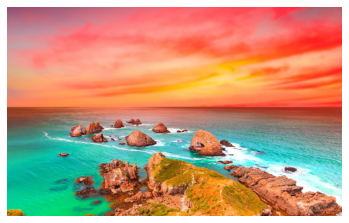

In [2]:
image = cv2.cvtColor(cv2.imread("C:\\SOI.jpg"), cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)

2. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение


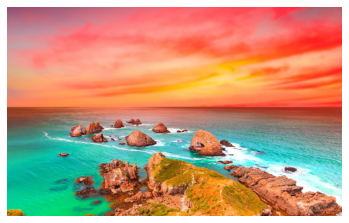

In [3]:
plt.axis("off")
plt.imshow(image)

In [4]:
def additive_noise(image, probability: float = 0.17):
    m, n, k = image.shape
    result_image = image.copy()
    pixels_combinations = list(itertools.product(range(image.shape[0]), range(image.shape[1])))
    noise_pixels = [pixel for pixel in pixels_combinations if np.random.random() <= probability]
    for noise_pixel in noise_pixels:
        for channel in range(k):
            if result_image[noise_pixel[0], noise_pixel[1]][channel] + 50 > 255:
                result_image[noise_pixel[0], noise_pixel[1]][channel] = 255
            else:
                result_image[noise_pixel[0], noise_pixel[1]][channel] += 50
    return result_image

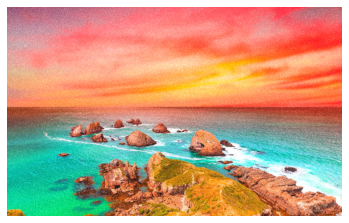

In [5]:
noise_image = additive_noise(image)
plt.axis("off")
plt.imshow(noise_image)

3. Написать функцию реализации ранговой фильтрации

> Функцию вида fun(Image, window, rank)  
Где window  - окно фильтрации (по вариантам)  
rank - опциональный параметр, значение ранга в ранговой фильтрации




In [6]:
def img_rank_filter(img, window=np.array([[1,2,1],[2,3,2],[1,2,1]]), rank=0):
    win_x, win_y = window.shape
    img_x, img_y, img_z = img.shape
    img_sliding_window = np.lib.stride_tricks.sliding_window_view(np.pad(img, [(1,1),(1,1),(0,0)], mode='constant'), (win_x, win_y, 3))
    fil_x, fil_y, fil_z, win_x, win_y, img_z = img_sliding_window.shape
    flat_win = window.flatten()
    img_sliding_window = np.repeat(img_sliding_window.reshape((fil_x*fil_y*fil_z, win_x*win_y, img_z)), flat_win, axis=1)
    ind_y = img_sliding_window[:].sum(axis=2).argsort()[:,rank]
    return img_sliding_window[np.arange(img_sliding_window.shape[0]), ind_y].reshape(img.shape)

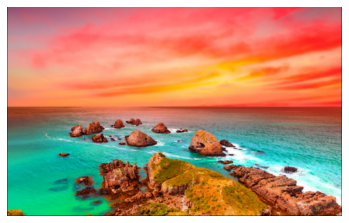

In [7]:
img_filtered = img_rank_filter(noise_image)
plt.axis("off")
plt.imshow(img_filtered)

4. Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам).  
Подсчитать СКО для результата фильтрации с каждым рангом.
  *   Вход: изображение из пункта 2
  *   Вывод: Значения СКО для каждого ранга. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованные изображения для первого, последнего ранга, а так же для ранга с наименьшим СКО.
  *   СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1


In [8]:
RANK_WINDOW = np.array([[1,2,1],[2,3,2],[1,2,1]])
RANK_WINDOW

array([[1, 2, 1],
       [2, 3, 2],
       [1, 2, 1]])

In [9]:
def mean_squared_error(original_image: np.ndarray, filter_image: np.ndarray) -> float:
    return np.square(original_image - filter_image).mean()

Зашумленное изображение:

СКО: 27.4017744


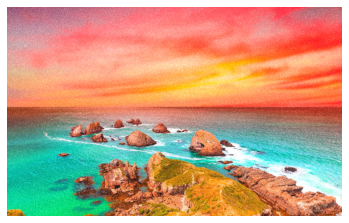

In [10]:
plt.axis("off")
plt.imshow(noise_image)
print(f"СКО: {mean_squared_error(image, noise_image)}")

Изображение, отфильтрованное ранговой обработкой с рангом 2
СКО: 28.488689066666666


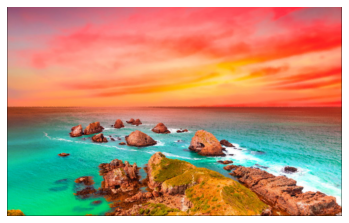

In [11]:
rank_filtering_image = img_rank_filter(noise_image, window=RANK_WINDOW, rank=2)
print("Изображение, отфильтрованное ранговой обработкой с рангом 2")
plt.axis("off")
plt.imshow(rank_filtering_image)
print(f"СКО: {mean_squared_error(image, rank_filtering_image)}")

In [12]:
max_rank = np.sum(RANK_WINDOW.flatten())

filtering_results = []
for r in range(15):
    fil_image = img_rank_filter(noise_image, window=RANK_WINDOW, rank=r)
    mse = mean_squared_error(image, fil_image)
    filtering_results.append((r, mse))
    print('Rank: ' + str(r) + ', std: ' + str(mse))

Rank: 0, std: 38.133856
Rank: 1, std: 33.08512746666667
Rank: 2, std: 28.488689066666666
Rank: 3, std: 23.030610666666668
Rank: 4, std: 17.455549333333334
Rank: 5, std: 16.7024016
Rank: 6, std: 16.493906666666668
Rank: 7, std: 18.799588266666667
Rank: 8, std: 23.929134933333334
Rank: 9, std: 32.20341653333333
Rank: 10, std: 43.292152
Rank: 11, std: 57.20433706666667
Rank: 12, std: 75.54377706666666
Rank: 13, std: 89.91292693333334
Rank: 14, std: 98.5813264


Лучшая фильтрация (ранг = 6):
СКО: 16.493906666666668


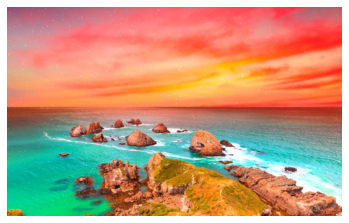

In [13]:
result_evaluations = sorted(filtering_results, key=lambda x: x[1])
best_rank = result_evaluations[0][0]
best_fil_image = img_rank_filter(noise_image, window=RANK_WINDOW, rank=best_rank)
print(f"Лучшая фильтрация (ранг = {best_rank}):")
plt.axis("off")
plt.imshow(best_fil_image)
print(f"СКО: {mean_squared_error(image, best_fil_image)}")

Худшая фильтрация (ранг = 14):
СКО: 98.5813264


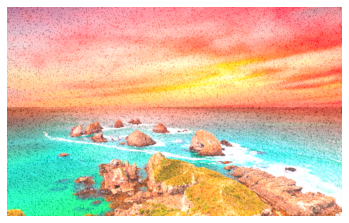

In [14]:
worst_rank = result_evaluations[-1][0]
worst_fil_image = img_rank_filter(noise_image, window=RANK_WINDOW, rank=worst_rank)
print(f"Худшая фильтрация (ранг = {worst_rank}):")
plt.axis("off")
plt.imshow(worst_fil_image)
print(f"СКО: {mean_squared_error(image, worst_fil_image)}")

5. Написать функцию реализации свертки

> Функцию вида fun(mat1, mat2)  
Где mat1  - первый сигнал. В данном случае изображение  
mat2 - второй сигнал. В данном ядро КИХ фильтра



In [15]:
def img_fir_filter(img, filter_kernel=np.array([[1,3,1],[3,7,3],[1,3,1]])*(1/23)):
    win_x, win_y = filter_kernel.shape
    img_x, img_y, img_z = img.shape
    img_sliding_window = np.lib.stride_tricks.sliding_window_view(np.pad(img, [(1,1),(1,1),(0,0)], mode='constant'), (win_x, win_y, 3))
    fil_x, fil_y, fil_z, win_x, win_y, img_z = img_sliding_window.shape
    img_sliding_window = img_sliding_window.reshape((fil_x*fil_y*fil_z, win_x*win_y, img_z))
    flat_rev_kernel = np.flip(filter_kernel.flatten()).reshape((9,1))
    return (img_sliding_window[:]*flat_rev_kernel).sum(axis=1).astype(uint8).reshape(img.shape)

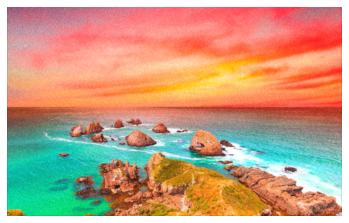

In [16]:
img_fir = img_fir_filter(noise_image)
plt.axis("off")
plt.imshow(img_fir)

6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.
  *   Вход: изображение из пункта 2
  *   Вывод: Значения СКО . Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение.
  *   СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1

Ядро КИХ-фильтра
[[0.04347826 0.13043478 0.04347826]
 [0.13043478 0.30434783 0.13043478]
 [0.04347826 0.13043478 0.04347826]]
Сумма элементов ядра: 1.0


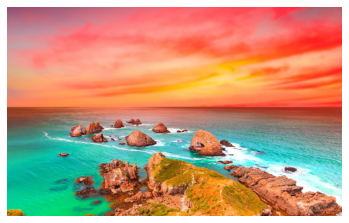

In [17]:
filter_kernel=np.array([[1,3,1],[3,7,3],[1,3,1]])*(1/23)
print("Ядро КИХ-фильтра")
print(filter_kernel)
print(f"Сумма элементов ядра: {np.sum(filter_kernel.flatten())}")
plt.axis("off")
plt.imshow(image)

Зашумленное изображение:
СКО: 27.4017744


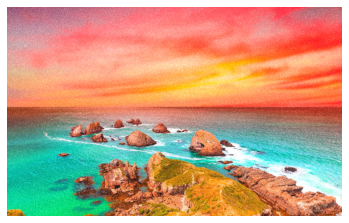

In [18]:
print("Зашумленное изображение:")
plt.axis("off")
plt.imshow(noise_image)
print(f"СКО: {mean_squared_error(image, noise_image)}")

Получившееся после КИХ-фильтра изображение:
СКО: 53.3479696


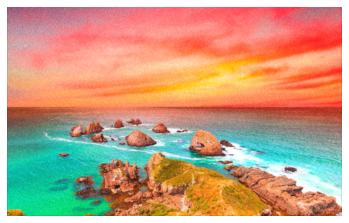

In [19]:
FIR_fil_image = img_fir_filter(noise_image, filter_kernel)

print("Получившееся после КИХ-фильтра изображение:")
plt.axis("off")
plt.imshow(FIR_fil_image)
print(f"СКО: {mean_squared_error(image, FIR_fil_image)}")